CONCLUSION:\
    1. How many people survived the disaster ?\
    2. How many people died ?\
    3. Calculate the survival rates as proportions (percentage)\
    4. Males that survived vs males that passed away\
    5. Females that survived vs Females that passed away\ 
    6. Does age play a role in the survival?\
    Since it's probable that children were saved first.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.shape

(891, 12)

In [7]:
train_df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [8]:
# it returns the pandas series with column names as the label index 
# values are the count of null values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#Separating out the columns which has more than 35% data missing
x = train_df.isnull().sum()
drop_col = x[x>(35/100*train_df.shape[0])]
drop_col

Cabin    687
dtype: int64

In [10]:
# Finding out the dropped column index
drop_col.index

Index(['Cabin'], dtype='object')

In [11]:
# 1.How many people survived the disaster ?

disaster_survived = train_df['Survived'].value_counts()[1]
print(str(disaster_survived) + " People Survived")

342 People Survived


In [12]:
# 2.How many people died ?

disaster_died = train_df['Survived'].value_counts()[0]
print(str(disaster_died)  + " People Died")

549 People Died


In [13]:
# 3.Calculate the survival rates as proportions (percentage)

disaster_survived_percentage = train_df['Survived'].value_counts(normalize=True)[1]
print(str(round(float(disaster_survived_percentage)*100,2)) + "% People Survived")

38.38% People Survived


In [14]:
disaster_died_percentage = train_df['Survived'].value_counts(normalize=True)[0]
print(str(round(float(disaster_died_percentage)*100,2)) + "% People Died")

61.62% People Died


In [15]:
# 4.Males that survived vs males that passed away

male_survived = train_df['Survived'][train_df['Sex'] == 'male'].value_counts(normalize=True)[1]
male_passed_away =  train_df['Survived'][train_df['Sex'] == 'male'].value_counts(normalize=True)[0]
print ("Male_survived : "+str(round(male_survived*100,2))+"%")
print ("Male_passed_away : "+str(round(male_passed_away*100,2))+"%")


Male_survived : 18.89%
Male_passed_away : 81.11%


In [16]:
# 5.Females that survived vs Females that passed away 

female_survived = train_df['Survived'][train_df['Sex'] == 'female'].value_counts(normalize=True)[1]
female_passed_away =  train_df['Survived'][train_df['Sex'] == 'female'].value_counts(normalize=True)[0]
print ("Female_survived : "+str(round(female_survived*100,2))+"%")
print ("Female_passed_away : "+str(round(female_passed_away*100,2))+"%")


Female_survived : 74.2%
Female_passed_away : 25.8%


In [17]:
# 6. Does age play a role?
# Since it's probable that children were saved first.

def filter_data(value):
    if 0 <= value <= 18:
        return 1
    else:
        return 0


train_df['Child'] = train_df['Age'].apply(filter_data)
c =  train_df['Survived'][train_df['Child'] == 1].value_counts(normalize=True)
print ("Child Survived : "+str(round(c[1]*100, 2))+"%")

Child Survived : 50.36%


C:\Users\shree\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\shree\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\shree\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\shree\anaconda3\lib\site-packages\pandas\plotting\_matpl

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Child'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Survived'}>, <AxesSubplot:>]],
      dtype=object)

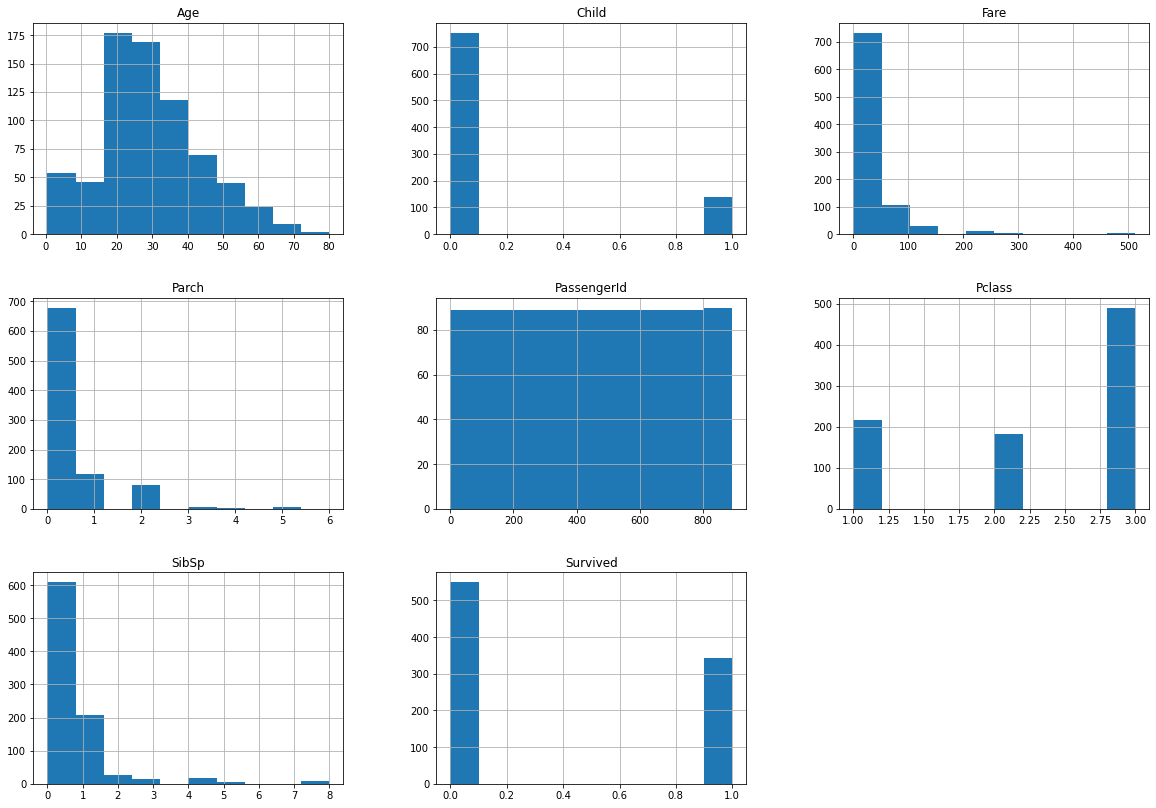

In [27]:
train_df.hist(figsize=(20,14))

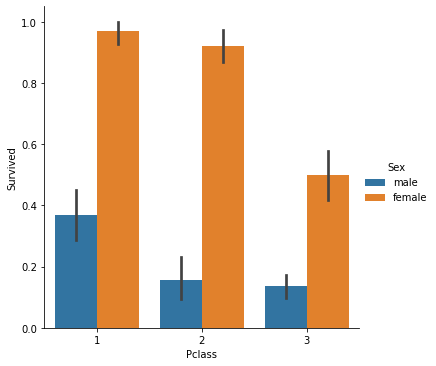

In [26]:
survied_chart = sns.catplot(x="Pclass", y ="Survived", hue = "Sex", data = train_df, kind="bar")
survied_chart